In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Preprocessing
df_diminos = pd.read_csv('diminos_data.csv')
df_diminos['order_placed_at'] = pd.to_datetime(df_diminos['order_placed_at'])
df_diminos['order_delivered_at'] = pd.to_datetime(df_diminos['order_delivered_at'])

In [3]:
# Calculate delivery time in minutes
df_diminos['delivery_time_minutes'] = (
    df_diminos['order_delivered_at'] - df_diminos['order_placed_at']
).dt.total_seconds() / 60

In [4]:
# Extract time-based features
df_diminos['hour'] = df_diminos['order_placed_at'].dt.hour
df_diminos['day_of_week'] = df_diminos['order_placed_at'].dt.day_name()
df_diminos['date'] = df_diminos['order_placed_at'].dt.date

In [5]:
# Calculate Key Metrics
p95_overall = df_diminos['delivery_time_minutes'].quantile(0.95)
print(f"Overall 95th Percentile Delivery Time: {p95_overall:.2f} minutes")

Overall 95th Percentile Delivery Time: 27.26 minutes


In [6]:
# Percentage of late deliveries (>31 mins)
late_deliveries = df_diminos[df_diminos['delivery_time_minutes'] > 31]
percentage_late = (len(late_deliveries) / len(df_diminos)) * 100
print(f"Percentage of orders taking > 31 mins: {percentage_late:.2f}%")

Percentage of orders taking > 31 mins: 3.71%


In [7]:
# Detailed Analysis (Hourly)
hourly_stats = df_diminos.groupby('hour')['delivery_time_minutes'].agg(
    ['mean', lambda x: x.quantile(0.95), 'count']
).reset_index()

hourly_stats.columns = ['hour', 'mean_delivery_time', 'p95_delivery_time', 'order_count']
print("\nHourly Statistics:")
print(hourly_stats)


Hourly Statistics:
    hour  mean_delivery_time  p95_delivery_time  order_count
0      0           24.116781          28.866990          621
1      1           20.836201          32.104821          610
2      2           19.123197          26.845717          610
3      3           19.846034          25.617373          629
4      4           18.818769          26.259762          633
5      5           17.727910          23.924907          641
6      6           18.501060          26.493076          658
7      7           18.368406          27.154475          559
8      8           19.264601          27.207707          603
9      9           33.320277          25.709020          634
10    10           21.014310          26.759252          627
11    11           25.908233          33.407016          655
12    12           19.731810          24.327900          625
13    13           18.403554          29.714826          622
14    14           18.999574          27.891228          631
15  

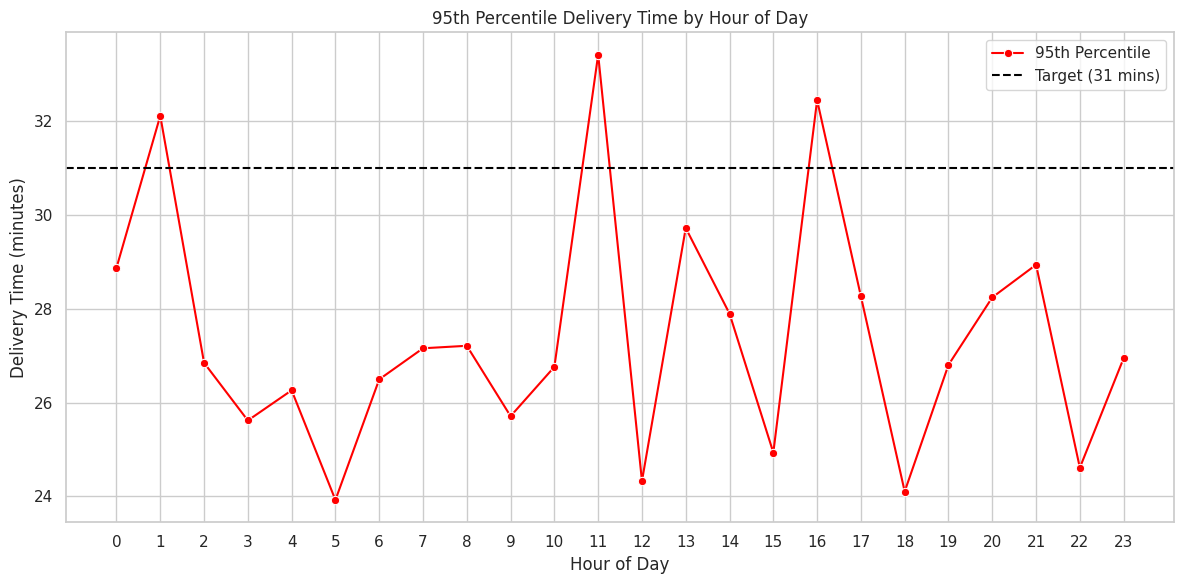

In [8]:
# Hourly 95th Percentile vs Target
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='p95_delivery_time', data=hourly_stats, marker='o', color='red', label='95th Percentile')
plt.axhline(y=31, color='black', linestyle='--', label='Target (31 mins)')
plt.title('95th Percentile Delivery Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

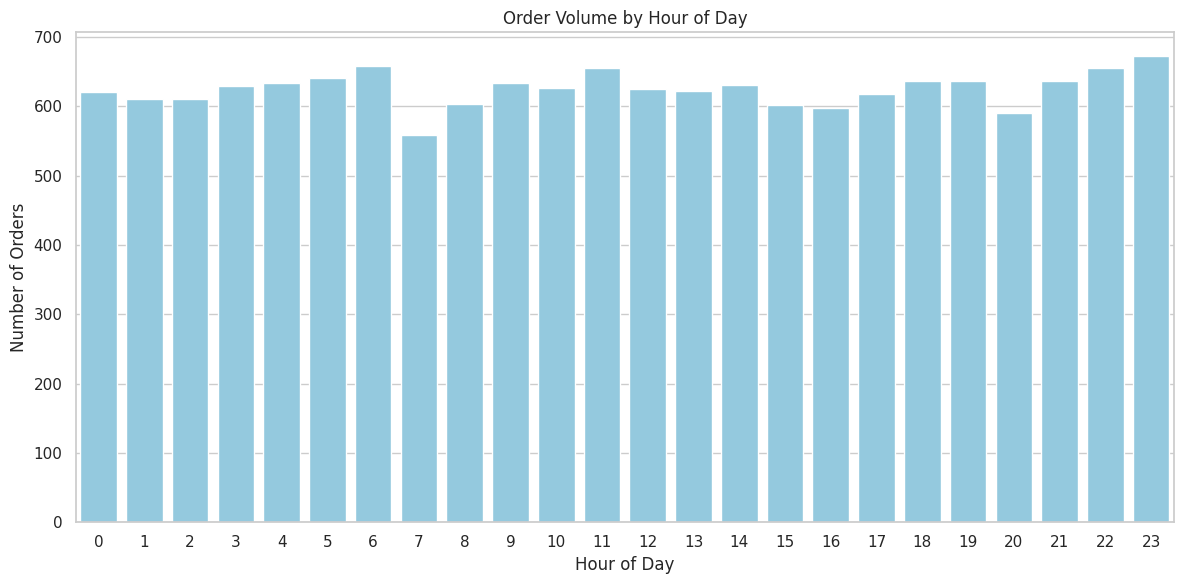

In [9]:
# Order Volume by Hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='order_count', data=hourly_stats, color='skyblue')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

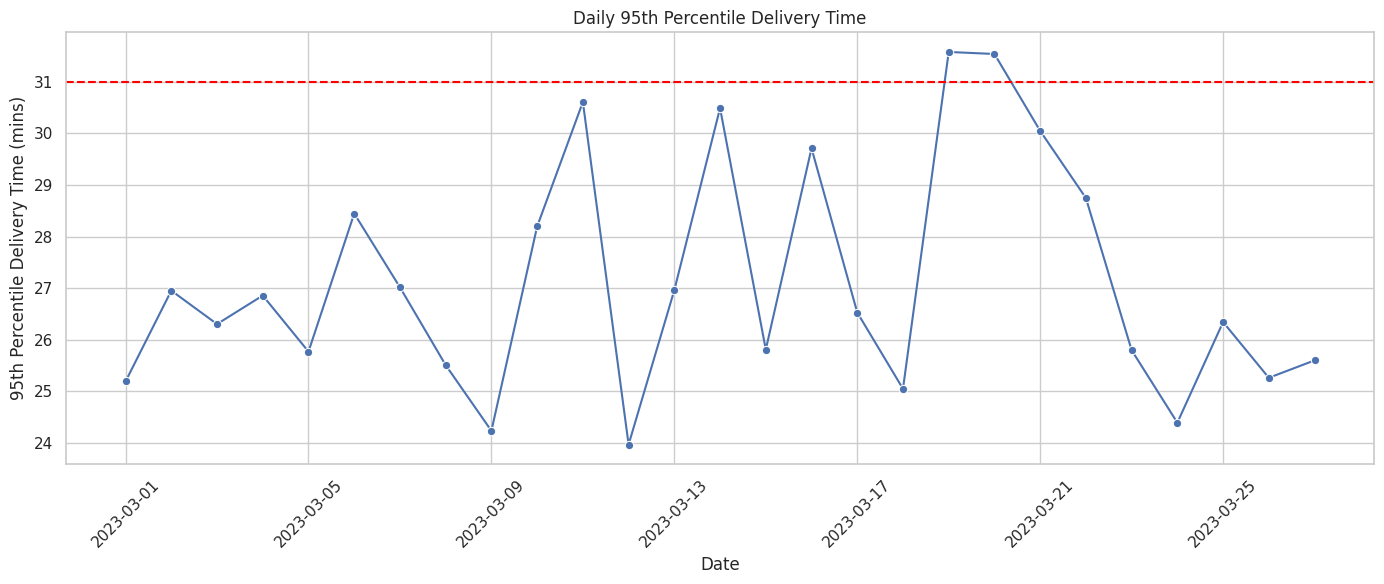

In [10]:
# Daily Trend
daily_stats = df_diminos.groupby('date')['delivery_time_minutes'].quantile(0.95).reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='delivery_time_minutes', data=daily_stats, marker='o')
plt.axhline(y=31, color='red', linestyle='--', label='Target (31 mins)')
plt.title('Daily 95th Percentile Delivery Time')
plt.xlabel('Date')
plt.ylabel('95th Percentile Delivery Time (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()